# Movie Recommender System

This notebook implements a content-based movie recommendation system using movie descriptions and genres. The system analyzes movie descriptions and genres to find similar movies based on text similarity.

## How it works:
1. Load and preprocess movie data
2. Combine movie descriptions with genres
3. Convert text data into numerical vectors
4. Calculate similarity between movies
5. Implement recommendation functions

## Step 1: Data Loading and Initial Exploration

Load the movie dataset from 'top10K-TMDB-movies.csv'. This dataset contains information about movies including:
- id
- title
- genre
- original_language
- overview
- popularity
- release_date
- vote_average
- vote_count

We'll first look at the data structure and first few rows to understand our dataset.

In [ ]:
import pandas as pd
df = pd.read_csv("top10K-TMDB-movies.csv")
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


## Step 2: Data Preprocessing

Clean the dataset by:
1. Removing any rows with missing values using `dropna()`
2. Selecting only the relevant columns
   - id
   - title
   - overview
   - genre

In [3]:
df =df.dropna()
df=df[['id', 'title', 'overview', 'genre']]
df

,id,title,overview,genre
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance"
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy"
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure"
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War"
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama"


## Step 3: Feature Creation

Merge the movie overview and genre. This combined text will be used to calculate similarity between movies.
1. combine the 'overview' and 'genre' columns into a new 'tags' column.
2. drop the original columns.

The resulting 'tags' column will contain both plot description and genre info, giving us a rich text feature for finding similar movies

In [4]:
df['tags'] = df['overview'] + " | Genre: " + df['genre']
df = df.drop(columns=['overview', 'genre'])
df.head(5)

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...


## Step 4: Text Vectorization

Convert the text data into numerical vectors using CountVectorizer:
- Use maximum 10,000 features to keep computation manageable
- Remove English stop words to focus on meaningful terms
- Convert text to a matrix where each row represents a movie and each column represents a word/term
- The resulting matrix will show how many times each term appears in each movie's combined description

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, stop_words='english')
vector=cv.fit_transform(df['tags'].values.astype('U')).toarray()
vector.shape

(9985, 10000)

## Step 5: Calculate Similarity Matrix

Calculate the cosine similarity between all movies:
- Cosine similarity measures the cosine of the angle between two vectors
- Results in a square matrix where each cell represents the similarity between two movies
- Values range from -1 (completely dissimilar) to 1 (identical)
- We'll use this similarity matrix to find movies that are most similar to any given movie

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vector)
similarity.shape
similarity

array([[1.        , 0.08219949, 0.15249857, ..., 0.09829464, 0.14213381,
        0.09284767],
       [0.08219949, 1.        , 0.10028244, ..., 0.02423931, 0.07009996,
        0.03052813],
       [0.15249857, 0.10028244, 1.        , ..., 0.04496938, 0.09753841,
        0.11327309],
       ...,
       [0.09829464, 0.02423931, 0.04496938, ..., 1.        , 0.06286946,
        0.05475857],
       [0.14213381, 0.07009996, 0.09753841, ..., 0.06286946, 1.        ,
        0.07918076],
       [0.09284767, 0.03052813, 0.11327309, ..., 0.05475857, 0.07918076,
        1.        ]])

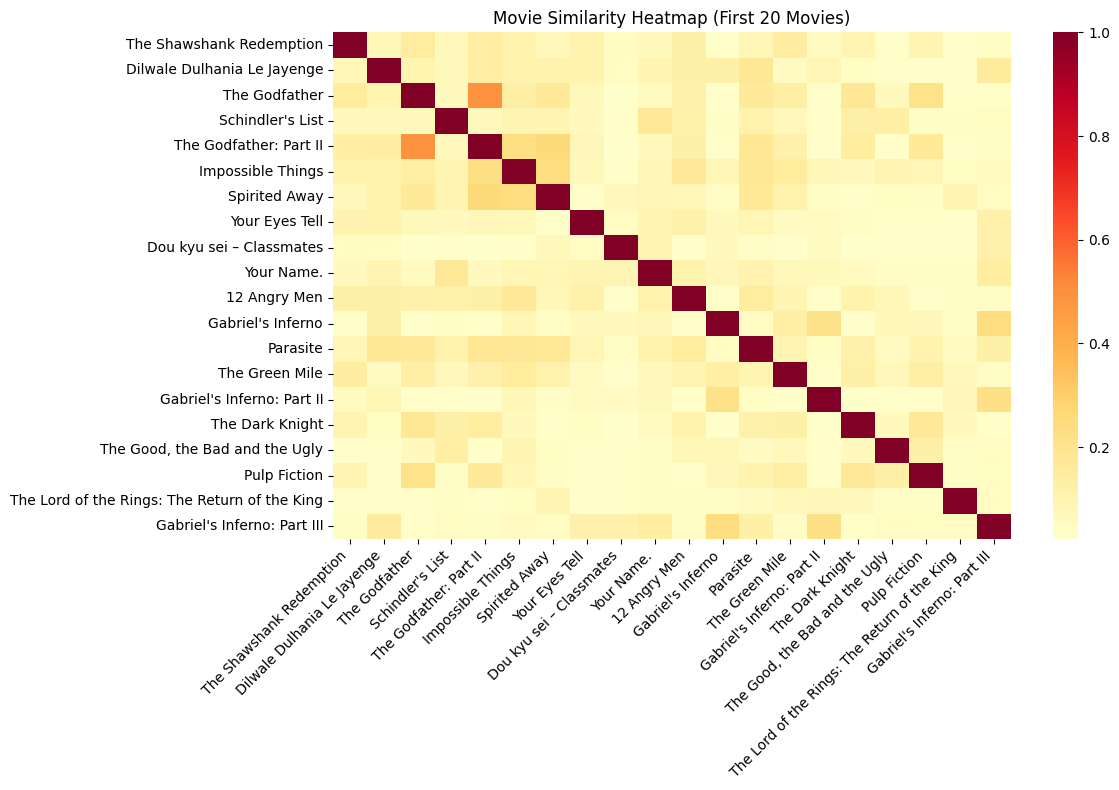

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Take a subset of movies (first 20) for better visualization
n_movies = 20
similarity_subset = similarity[:n_movies, :n_movies]
movie_titles = df['title'].iloc[:n_movies].values

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(similarity_subset, xticklabels=movie_titles, yticklabels=movie_titles, 
            cmap='YlOrRd', annot=False)
plt.title('Movie Similarity Heatmap (First 20 Movies)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Step 6: Recommendation Functions

Create two utility functions to recommend similar movies:
1. `recommand_by_movie_name`: Takes a movie title and returns similar movies
2. `recommand_by_movie_id`: Takes a movie ID and returns similar movies

Both functions:
- Find the index of the input movie in our dataset
- Get the similarity scores for that movie compared to all other movies
- Sort the movies by similarity score (descending)
- Return the titles of the 8 most similar movies (excluding the input movie itself)

In [28]:
def recommend_by_movie_name(movie_name):
    index = df[df['title']==movie_name].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    recommendations = []
    for i in distance[1:9]:
        movie_info = df.iloc[i[0]]
        recommendations.append({
            'id': movie_info['id'],
            'title': movie_info['title']
        })
    recommendations = sorted(recommendations, key=lambda x: x['title'])
    return pd.DataFrame(recommendations)

In [29]:
def recommend_by_movie_id(movie_id):
    index = df[df['id']==movie_id].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    recommendations = []
    for i in distance[1:9]:
        movie_info = df.iloc[i[0]]
        recommendations.append({
            'id': movie_info['id'],
            'title': movie_info['title']
        })
    recommendations = sorted(recommendations, key=lambda x: x['title'])
    return pd.DataFrame(recommendations)

## Testing the Recommender System

Let's test our recommendation system with some example movies:
1. Using movie title: "The Dark Knight"
2. Using movie ID: 155

The system will return 8 similar movies for each input, sorted alphabetically.

In [30]:
recommend_by_movie_name("The Dark Knight")

,id,title
0,414,Batman Forever
1,382322,Batman: The Killing Joke
2,736073,"Batman: The Long Halloween, Part One"
3,736074,"Batman: The Long Halloween, Part Two"
4,475557,Joker
5,9546,Ricochet
6,414906,The Batman
7,49026,The Dark Knight Rises


In [31]:
recommend_by_movie_id(155)

,id,title
0,414,Batman Forever
1,382322,Batman: The Killing Joke
2,736073,"Batman: The Long Halloween, Part One"
3,736074,"Batman: The Long Halloween, Part Two"
4,475557,Joker
5,9546,Ricochet
6,414906,The Batman
7,49026,The Dark Knight Rises


## Saving the processed DataFrame to disk
the web application can simply load the pre-processed data from movies.pkl instead of having to process the raw CSV file every time it starts up.

In [15]:
import pickle
pickle.dump(df, open('movies.pkl', 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [16]:
pickle.load(open('movies.pkl', 'rb'))

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


In [17]:
pickle.load(open('similarity.pkl', 'rb'))

array([[1.        , 0.08219949, 0.15249857, ..., 0.09829464, 0.14213381,
        0.09284767],
       [0.08219949, 1.        , 0.10028244, ..., 0.02423931, 0.07009996,
        0.03052813],
       [0.15249857, 0.10028244, 1.        , ..., 0.04496938, 0.09753841,
        0.11327309],
       ...,
       [0.09829464, 0.02423931, 0.04496938, ..., 1.        , 0.06286946,
        0.05475857],
       [0.14213381, 0.07009996, 0.09753841, ..., 0.06286946, 1.        ,
        0.07918076],
       [0.09284767, 0.03052813, 0.11327309, ..., 0.05475857, 0.07918076,
        1.        ]])